In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('diabetic_data.csv')

In [4]:
data.shape

(101766, 50)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Text(0, 0.5, 'Count')

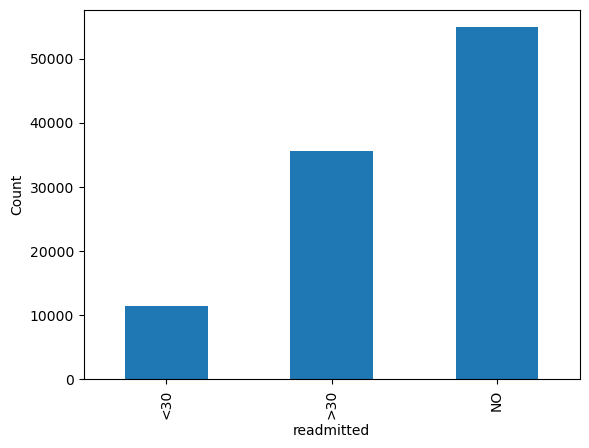

In [7]:
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [8]:
data['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in data['readmitted']])
data_origin = data

Text(0, 0.5, 'Count')

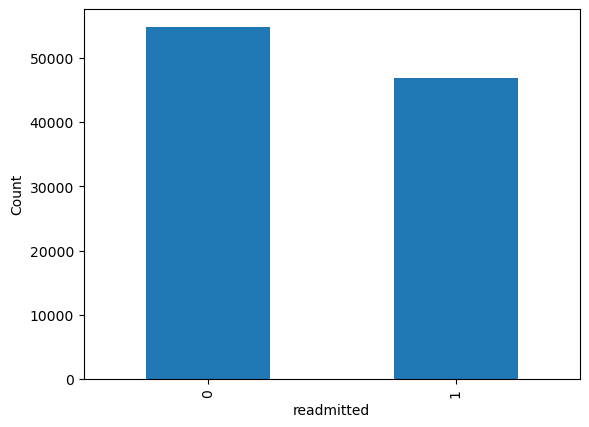

In [9]:
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [11]:
data.drop(['encounter_id', 'patient_nbr', 'payer_code'], axis=1, inplace=True)

In [12]:
data[data['weight'] == '?'].shape[0] * 1.0 / data.shape[0]

0.9685847925633315

In [13]:
data[data['medical_specialty'] == '?'].shape[0] * 1.0 / data.shape[0]

0.49082208203132677

In [14]:
data.drop(['weight', 'medical_specialty'], axis=1, inplace=True)

In [15]:
data = data[data['race'] != '?']
data = data[data['diag_1'] != '?']
data = data[data['diag_2'] != '?']
data = data[data['diag_3'] != '?']
data = data[data['gender'] != 'Unknown/Invalid']

Text(0, 0.5, 'Count')

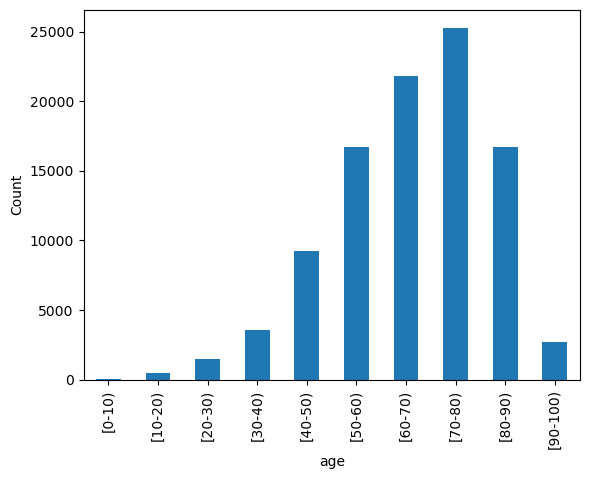

In [16]:
data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

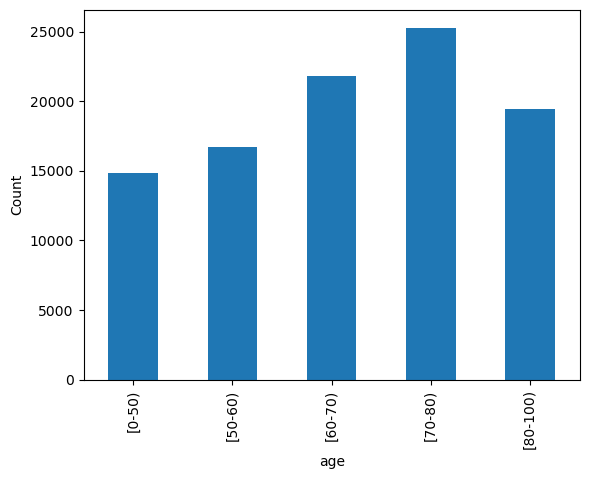

In [17]:
data['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in data['age']], index=data.index)

data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

In [18]:
data['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other discharge' 
                                              for val in data['discharge_disposition_id']], index=data.index)

In [19]:
data['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val == 1 else 'Other source' 
                                              for val in data['admission_source_id']], index=data.index)

In [20]:
data['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' 
                                              for val in data['admission_type_id']], index=data.index)

Text(0, 0.5, 'Count')

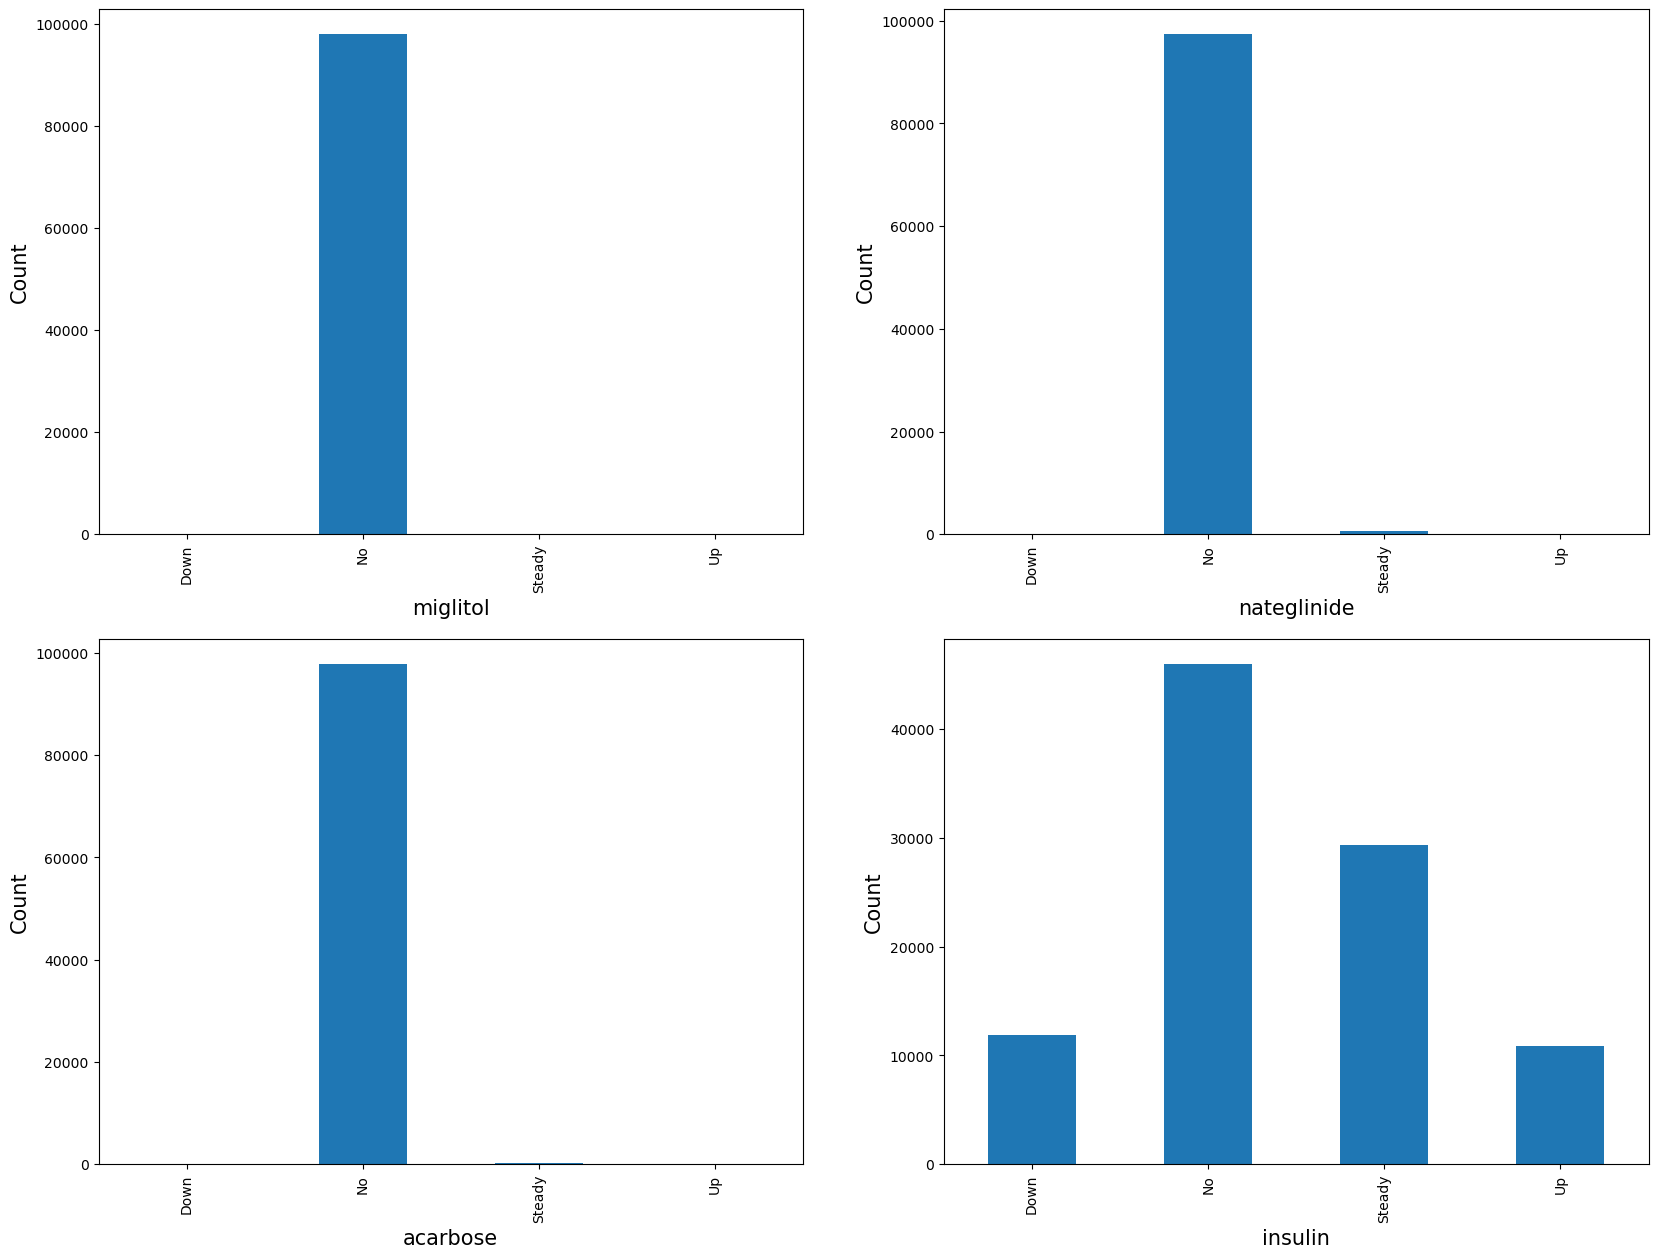

In [21]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(221)
ax1 = data.groupby('miglitol').size().plot(kind='bar')
plt.xlabel('miglitol', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax2 = fig.add_subplot(222)
ax2 = data.groupby('nateglinide').size().plot(kind='bar')
plt.xlabel('nateglinide', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax3 = fig.add_subplot(223)
ax3 = data.groupby('acarbose').size().plot(kind='bar')
plt.xlabel('acarbose', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax4 = fig.add_subplot(224)
ax4 = data.groupby('insulin').size().plot(kind='bar')
plt.xlabel('insulin', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [22]:
data.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

In [23]:
data['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in data['diag_1']], index=data.index)
data.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

In [24]:
data.shape

(98052, 21)

In [25]:
list(data.columns.values)

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [26]:
df_age = pd.get_dummies(data['age'])
df_race = pd.get_dummies(data['race'])
df_gender = pd.get_dummies(data['gender'])
df_max_glu_serum = pd.get_dummies(data['max_glu_serum'])
df_A1Cresult = pd.get_dummies(data['A1Cresult'])
df_insulin = pd.get_dummies(data['insulin'])
df_change = pd.get_dummies(data['change'])
df_diabetesMed = pd.get_dummies(data['diabetesMed'])
df_discharge_disposition_id = pd.get_dummies(data['discharge_disposition_id'])
df_admission_source_id = pd.get_dummies(data['admission_source_id'])
df_admission_type_id = pd.get_dummies(data['admission_type_id'])

data = pd.concat([data, df_age, df_race, df_gender, df_max_glu_serum, df_A1Cresult, 
                  df_insulin, df_change, df_diabetesMed, df_discharge_disposition_id, 
                  df_admission_source_id, df_admission_type_id], axis=1)
data.drop(['age', 'race', 'gender', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 
                  'diabetesMed', 'discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id'], axis=1, inplace=True)

In [27]:
data['number_outpatient'] = data['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
data['number_emergency'] = data['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
data['number_inpatient'] = data['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [28]:
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[feature_scale_cols])
data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)
data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

In [29]:
X = data.drop(['readmitted'], axis=1)
y = data['readmitted']

In [32]:
from sklearn.model_selection import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)

Top 6 features are: 
num_lab_procedures
num_medications
time_in_hospital
num_procedures
number_diagnoses
number_inpatient


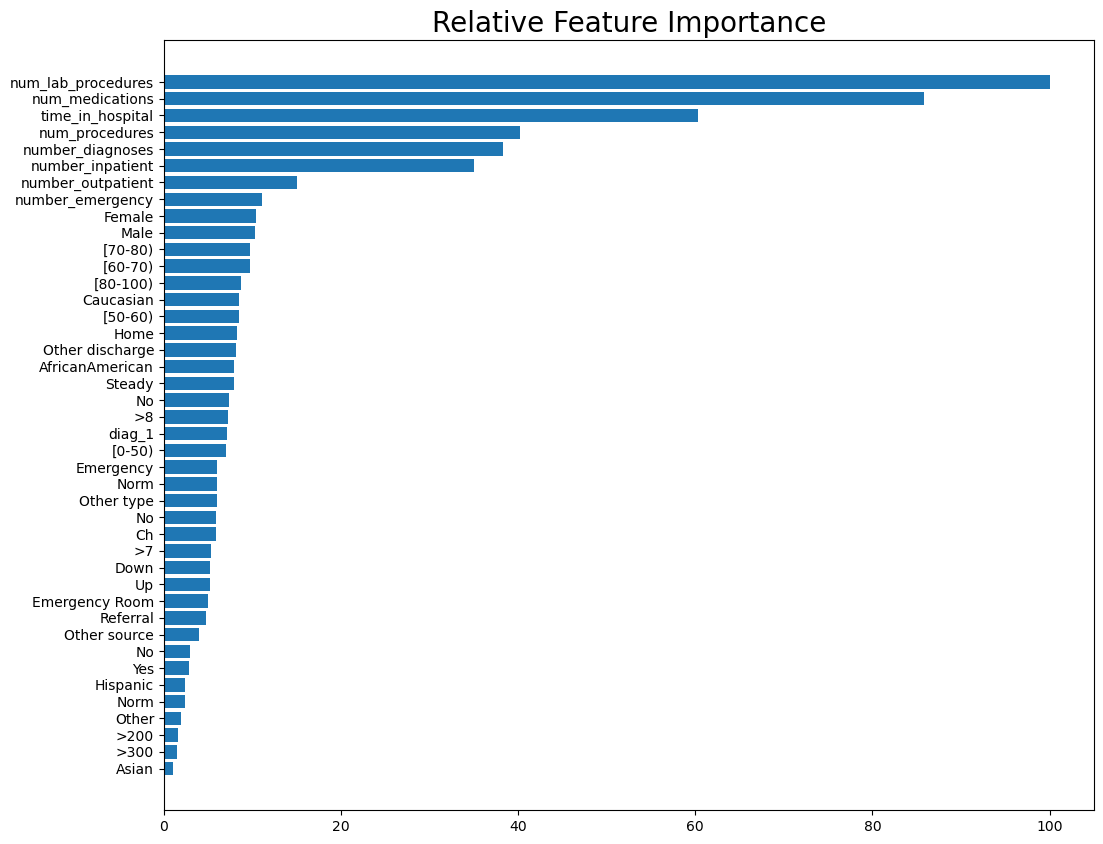

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 6 features are: ')
for feature in feature_names_sort[::-1][:6]:
    print (feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [36]:
X_cv_top6 = X_cv[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses',
           'number_inpatient']]

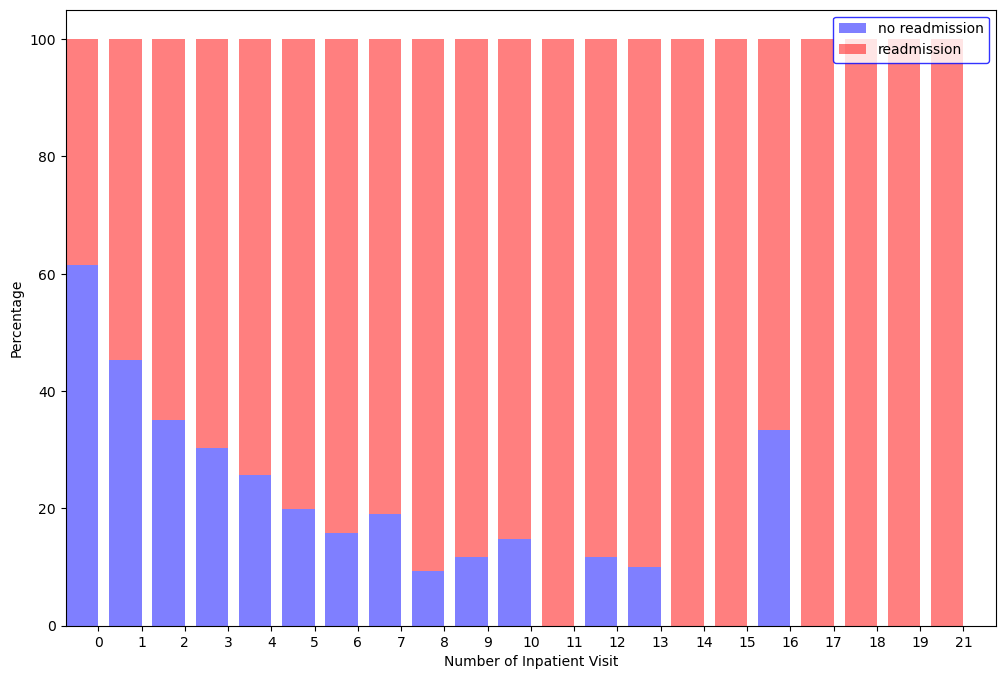

In [38]:
group = data_origin.groupby(['number_inpatient', 'readmitted'])['number_inpatient'].count().unstack().fillna(0)

zero_pct, one_pct = [], []

for i in list(range(20)) + [21]:
    zero_pct_value = group[0][i] * 100.0 / (group[0][i] + group[1][i])
    one_pct_value = 100 - zero_pct_value
    zero_pct.append(zero_pct_value)
    one_pct.append(one_pct_value)

raw_data = {
    'number_inpatient': list(range(20)) + [21],
    'no readmission': zero_pct, 
    'readmission': one_pct
}
df = pd.DataFrame(raw_data, columns=['number_inpatient', 'no readmission', 'readmission'])

f, ax1 = plt.subplots(1, figsize=(12, 8))
bar_width = 0.75
bar_l = [i + 1 for i in range(len(df['number_inpatient']))]
tick_pos = [i + (bar_width / 2) for i in bar_l]

ax1.bar(bar_l, 
        df['no readmission'], 
        width=bar_width,
        label='no readmission', 
        alpha=0.5, 
        color='blue')

ax1.bar(bar_l, 
        df['readmission'], 
        width=bar_width,
        bottom=df['no readmission'], 
        label='readmission', 
        alpha=0.5, 
        color='red')

plt.xticks(tick_pos, df['number_inpatient'])
ax1.set_ylabel("Percentage")
ax1.set_xlabel("Number of Inpatient Visit")
legend = plt.legend(loc='upper right', frameon=True)
legend.get_frame().set_edgecolor('b')
plt.xlim([min(tick_pos) - bar_width, max(tick_pos) + bar_width])

plt.show()


In [40]:
from sklearn.model_selection import cross_val_score


In [43]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_cv, y_cv, cv=10, scoring='accuracy').mean()
RF_score

0.6097716475815107

In [44]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
NB_score = cross_val_score(clf2, X_cv, y_cv, cv=10, scoring='accuracy').mean()
NB_score

0.5992601799734963

In [45]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
LR_score = cross_val_score(clf3, X_cv, y_cv, cv=10, scoring='accuracy').mean()
LR_score

0.6181753613689339

Text(0, 0.5, 'Cross-Validated Accuracy')

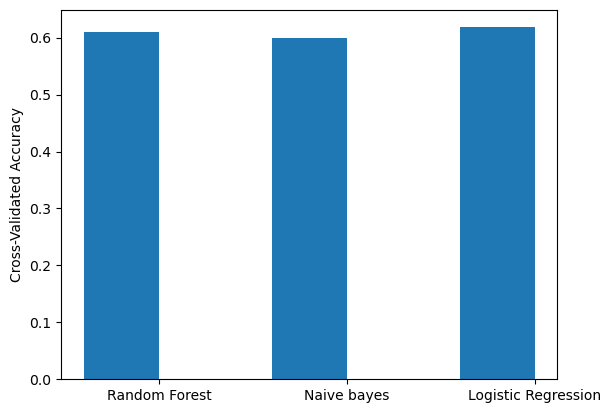

In [46]:
x_axis = np.arange(3)
y_axis = [RF_score, NB_score, LR_score]
plt.bar(x_axis, y_axis, width=0.4)
plt.xticks(x_axis + 0.4/2., ('Random Forest', 'Naive bayes', 'Logistic Regression'))
plt.ylabel('Cross-Validated Accuracy')

In [47]:
LR_score_top = cross_val_score(clf3, X_cv_top6, y_cv, cv=10, scoring='accuracy').mean()
LR_score_top

0.611308248506

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

C_range = np.arange(0.1, 3.1, 0.2)
param_grid = {'C': C_range}



clf = LogisticRegression(max_iter=1000,solver='liblinear')  # Increase max_iter here

grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_cv, y_cv)




GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9])},
             scoring='accuracy')

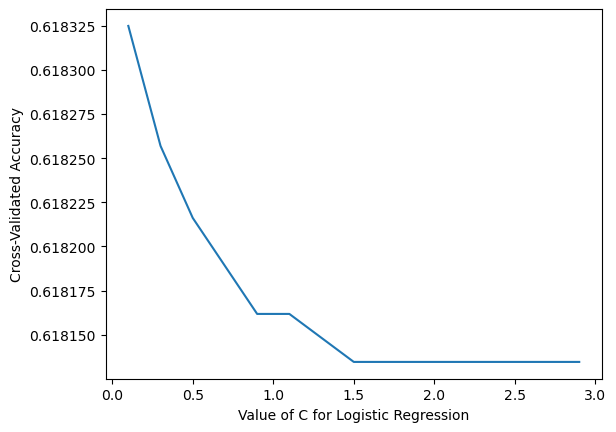

In [63]:
import matplotlib.pyplot as plt

grid_mean_scores = grid.cv_results_['mean_test_score']  # Access mean test scores
plt.plot(C_range, grid_mean_scores)
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-Validated Accuracy')
plt.show()  


In [65]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


0.6183249416789545
{'C': 0.1}
LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')


In [66]:
y_test.value_counts()

readmitted
0    12916
1    11597
Name: count, dtype: int64

In [67]:
max(y_test.mean(), 1 - y_test.mean())

0.5269040917064415

In [69]:
logreg = LogisticRegression(C=grid.best_params_['C'],class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
logreg.fit(X_cv, y_cv)

LogisticRegression(C=0.1, multi_class='ovr', n_jobs=1, solver='liblinear')

In [71]:
from sklearn import metrics
y_pred_class = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.6237506629135561


In [73]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print (confusion)

[[10130  2786]
 [ 6437  5160]]


In [74]:
print (metrics.recall_score(y_test, y_pred_class))

0.44494265758385787


In [75]:
print (TN / float(TN + FP))

0.7842985444410034


In [76]:
print (FP / float(TN + FP))

0.21570145555899659


In [77]:
print (metrics.precision_score(y_test, y_pred_class))

0.6493833375283161


In [78]:
print (metrics.f1_score(y_test, y_pred_class))

0.5280663153047127


In [79]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

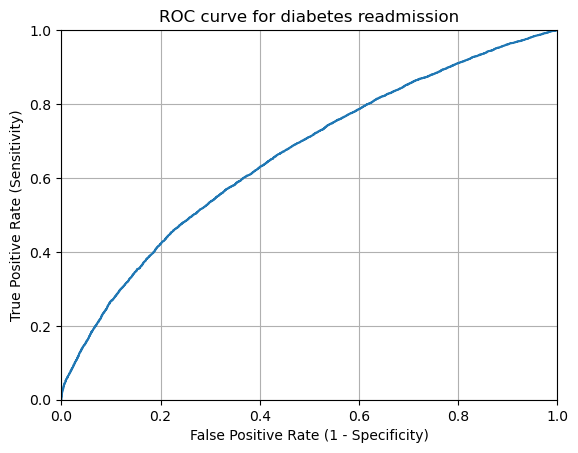

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes readmission')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [82]:
print (metrics.roc_auc_score(y_test, y_pred_prob))

0.6606799440581073


In [84]:
def evaluate_threshold(threshold):
    print ('Sensitivity:', tpr[thresholds > threshold][-1])
    print ('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [85]:
evaluate_threshold(0.40)

Sensitivity: 0.7313098215055618
Specificity: 0.47352121399814184


In [86]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred_new = []

for i in range(len(y_pred_prob)):
    if y_pred_prob[i][1] > 0.4:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)

print (metrics.accuracy_score(y_test, y_pred_new))

0.5954799494145964
